#Bank Telemarketing of term deposit


**Problem statement:**
Every three months, a bank engages in a telemarketing campaign to advertise to consumers its term deposit product. Regrettably, the outcomes of the preceding campaign fell short of their expectations. The marketing manager wants to launch a fresh campaign. They will require a thorough examination of previous campaigns' consumer behavior to do this. The bank can then concentrate its marketing efforts on these clients. By reducing unwanted marketing to certain consumers, this will enhance customer satisfaction in addition to assisting the bank in better securing deposits.


**Objective:**
You must analyze the available data as a data scientist to determine which variables significantly affect customers' deposits before creating a prediction model that may foretell whether or not customers will sign up for a term deposit. Determine which clients did not deposit despite our repeated attempts to contact them and our taking the appropriate procedures to make sure they were not even considering making a term deposit.




**Data Description**
The data contains the different attributes of customers' term deposit. The detailed data dictionary is given below.

**Data Dictionary**

1. age: A customer's age
2. occupation: category
3. marital: status of the union
4. Education: Consumer education
5. default: has a defaulted credit
6. Balance: The customer's balance.
7. Housing: Does the client have a mortgage? (yes,no,unknown)
8. loan: Customer has a personal loan, 8. (yes,no,unknown)
9. client contact: method of communication
10. day: The final day of the week for contact (mon,tue,wed,thu,fri)
11. month: Customer last contacted in month 11. (mar,apr,may,jun,jul,aug,sep,oct,nov,dec)
12. duration: the time since the last contact, in seconds
13. campaign: total contacts made as part of the ongoing campaign.
14. pdays: The number of days since the client was last contacted by a previous campaign.
15. before: total connections made prior to this campaign.
16. poutcome: the result of a prior campaign
17. y: Has the client signed up for a deposit

##**Loading the necessary files**

In [121]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using standard scaler
from sklearn.preprocessing import StandardScaler

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# to split the data in to training and testing
from sklearn.model_selection import train_test_split

# to perform model building using sklearn decision tree
from sklearn.tree import DecisionTreeClassifier

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


# to compute distances
from scipy.spatial.distance import cdist, pdist

# to handle multi collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to perform model building using statmodels logistic regression
import statsmodels.api as sm

# to tune different models
from sklearn.model_selection import GridSearchCV

# to display or show the decision tree architecture
from sklearn import tree

#onehot encoder
import category_encoders as ce

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## loading the dataset

The dataset is taken from the below link:https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing

In [2]:
# reading the data
data = pd.read_csv(r"C:/Users/Anagha/Downloads/bank (2)/bank-full.csv", sep=';')
data.head()#displays first 5 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Data Preprocessing**
1. Missing value treatment
2. Feature engineering 
3. Preparing data for modeling (Train test split)
4. Dropping unnecessary columns

#1. Missing value treatment

In [3]:
data.shape#displays number of rows and coloumns

(45211, 17)

There are 45211 rows in total which are non null and 17 coloumns of observation in total.

In [4]:
data.dtypes#displays datatypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

There are 17 coloumns in total out of which 7 are of integer data types and rest all are object data type.

In [5]:
data.info()#another way to get to know the datatypes and its info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.describe()#to get to know the numerical data like mean,standard deviation,min,max etc

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* The average age of the customers is around 41 years. 75% of the customers are below 48 years and the minimum age of the customer is 18. This indicates that customers in the age group 18-49 make more term deposits.
* The average duration of a call is 258 seconds.
* In the current campaign, 75% of calls are made three times.

In [7]:
# Select a numeric and category column name of dataset
numeric_col = data.select_dtypes(include=['int64', 'float64']).columns
category_col = data.select_dtypes(include=['object']).columns

In [8]:
# Print unique values for each column
for col in category_col:
    print(col, "(", len(data[col].unique()) , "values):\n", np.sort(data[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


From the above output we can clearly see that there are no ambiguious values to replace hence we can keep the dataset as it is

In [9]:
# Check a sum of null value
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no coloumns which has missing values hence the missing value treatment is not required


## Exploratory data Analysis

[Text(0, 0, 'may'),
 Text(1, 0, 'jun'),
 Text(2, 0, 'jul'),
 Text(3, 0, 'aug'),
 Text(4, 0, 'oct'),
 Text(5, 0, 'nov'),
 Text(6, 0, 'dec'),
 Text(7, 0, 'jan'),
 Text(8, 0, 'feb'),
 Text(9, 0, 'mar'),
 Text(10, 0, 'apr'),
 Text(11, 0, 'sep')]

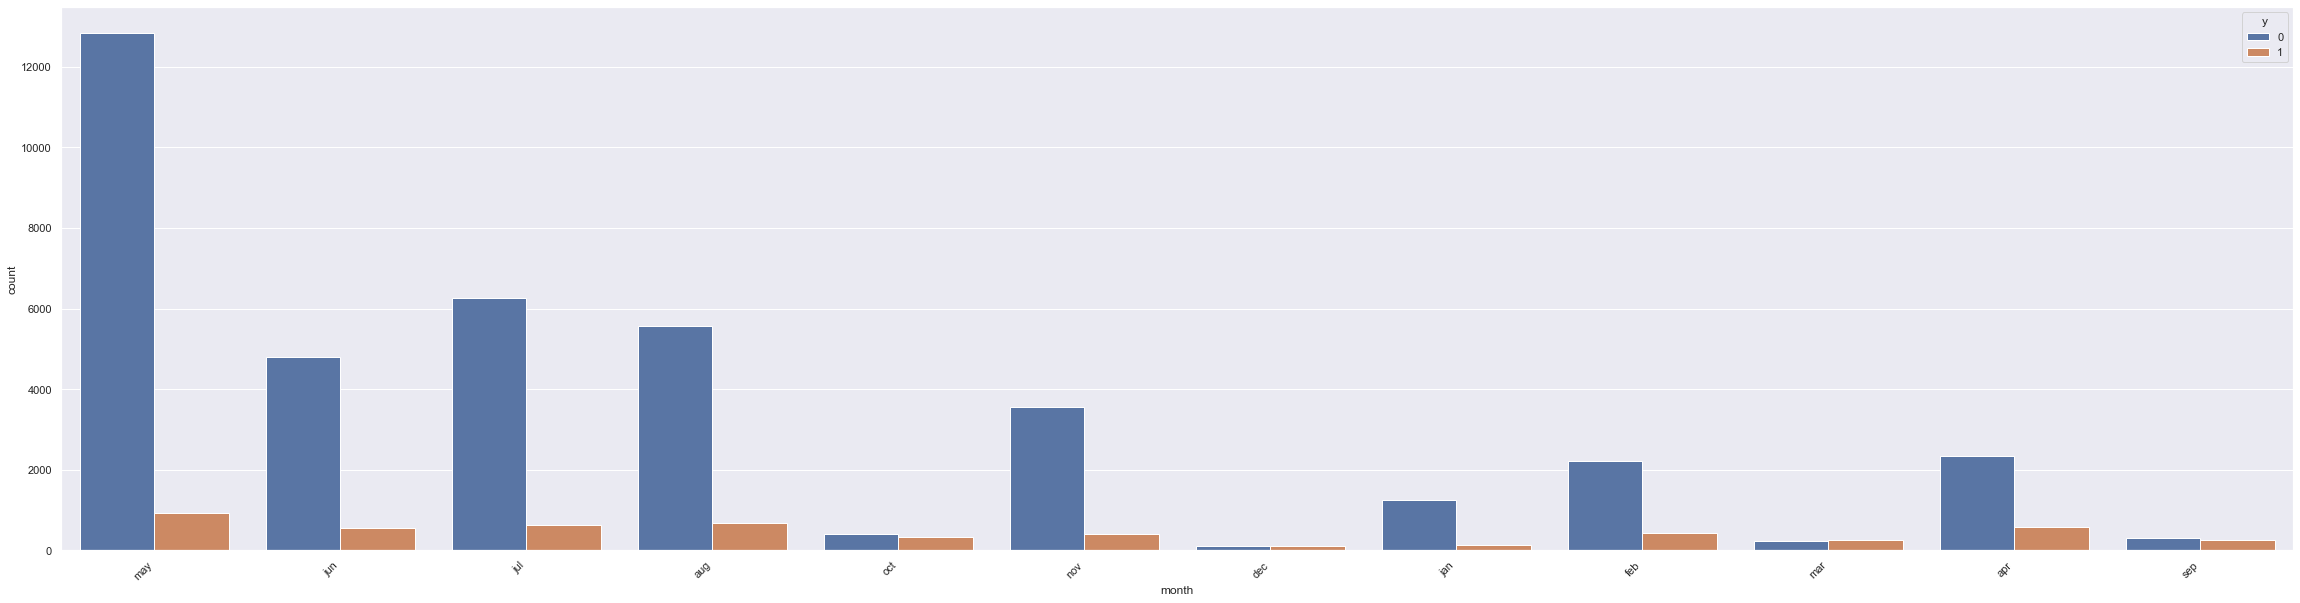

In [54]:
#graph of month 
plt.figure(figsize=(40,10))
chart=sns.countplot(data=data,x='month',hue='y')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

During the month of May,June,July,Aug most of the customers have subscribed to term deposit.

[Text(0, 0, '18'),
 Text(1, 0, '19'),
 Text(2, 0, '20'),
 Text(3, 0, '21'),
 Text(4, 0, '22'),
 Text(5, 0, '23'),
 Text(6, 0, '24'),
 Text(7, 0, '25'),
 Text(8, 0, '26'),
 Text(9, 0, '27'),
 Text(10, 0, '28'),
 Text(11, 0, '29'),
 Text(12, 0, '30'),
 Text(13, 0, '31'),
 Text(14, 0, '32'),
 Text(15, 0, '33'),
 Text(16, 0, '34'),
 Text(17, 0, '35'),
 Text(18, 0, '36'),
 Text(19, 0, '37'),
 Text(20, 0, '38'),
 Text(21, 0, '39'),
 Text(22, 0, '40'),
 Text(23, 0, '41'),
 Text(24, 0, '42'),
 Text(25, 0, '43'),
 Text(26, 0, '44'),
 Text(27, 0, '45'),
 Text(28, 0, '46'),
 Text(29, 0, '47'),
 Text(30, 0, '48'),
 Text(31, 0, '49'),
 Text(32, 0, '50'),
 Text(33, 0, '51'),
 Text(34, 0, '52'),
 Text(35, 0, '53'),
 Text(36, 0, '54'),
 Text(37, 0, '55'),
 Text(38, 0, '56'),
 Text(39, 0, '57'),
 Text(40, 0, '58'),
 Text(41, 0, '59'),
 Text(42, 0, '60'),
 Text(43, 0, '61'),
 Text(44, 0, '62'),
 Text(45, 0, '63'),
 Text(46, 0, '64'),
 Text(47, 0, '65'),
 Text(48, 0, '66'),
 Text(49, 0, '67'),
 Text(50, 

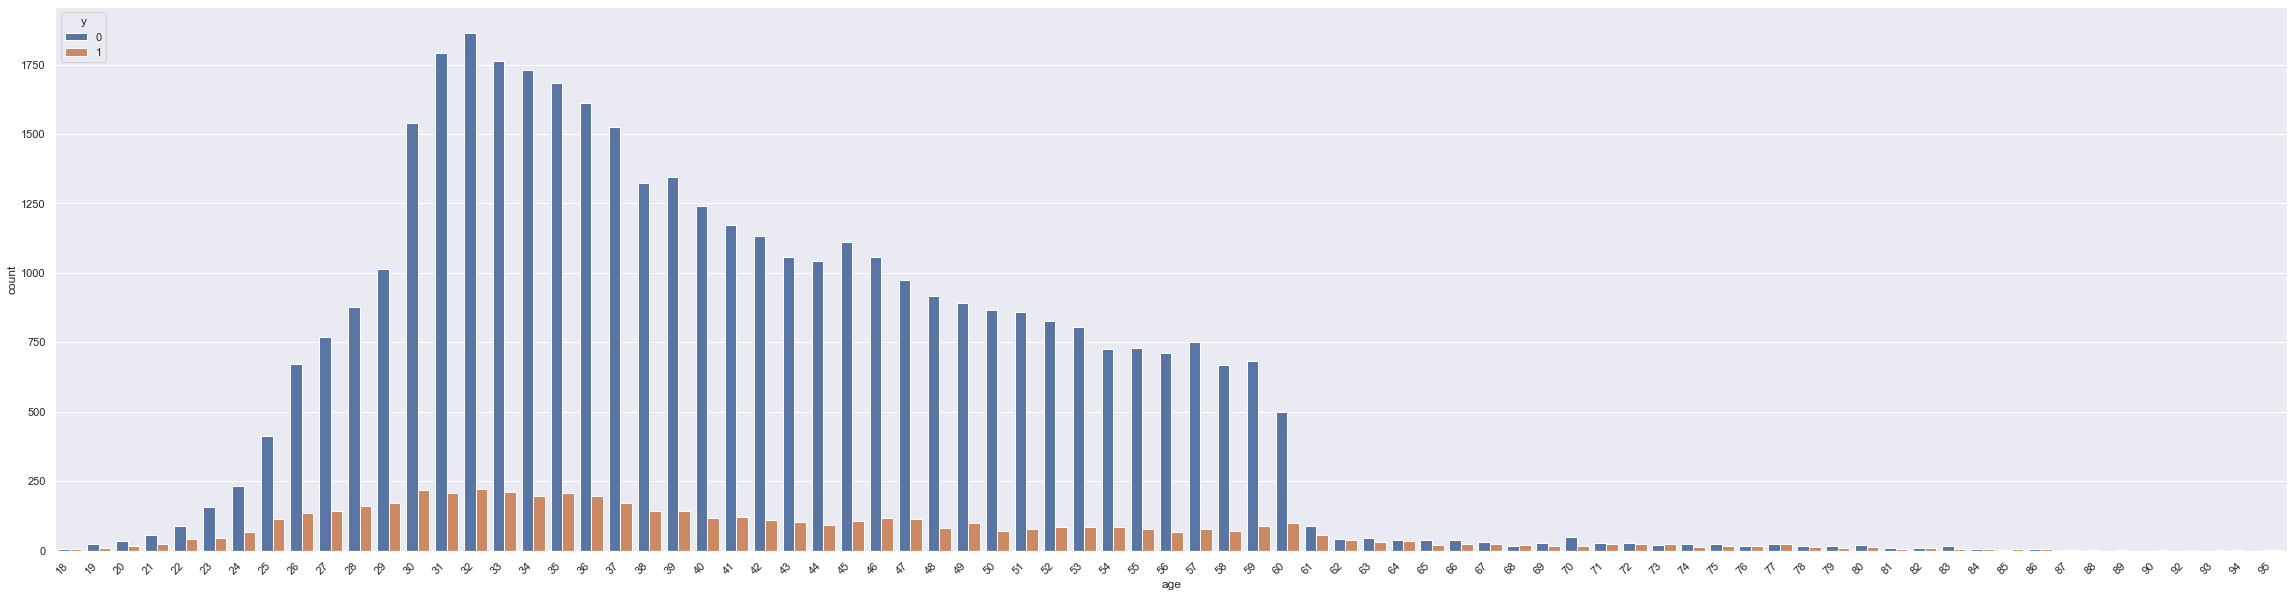

In [55]:
#graph of subscription withrespect to age  
plt.figure(figsize=(40,10))
chart=sns.countplot(data=data,x='age',hue='y')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

The age of the customer who has suscribed for term deposit are between 24-60 but the maximum subscription starts from 30-60 years

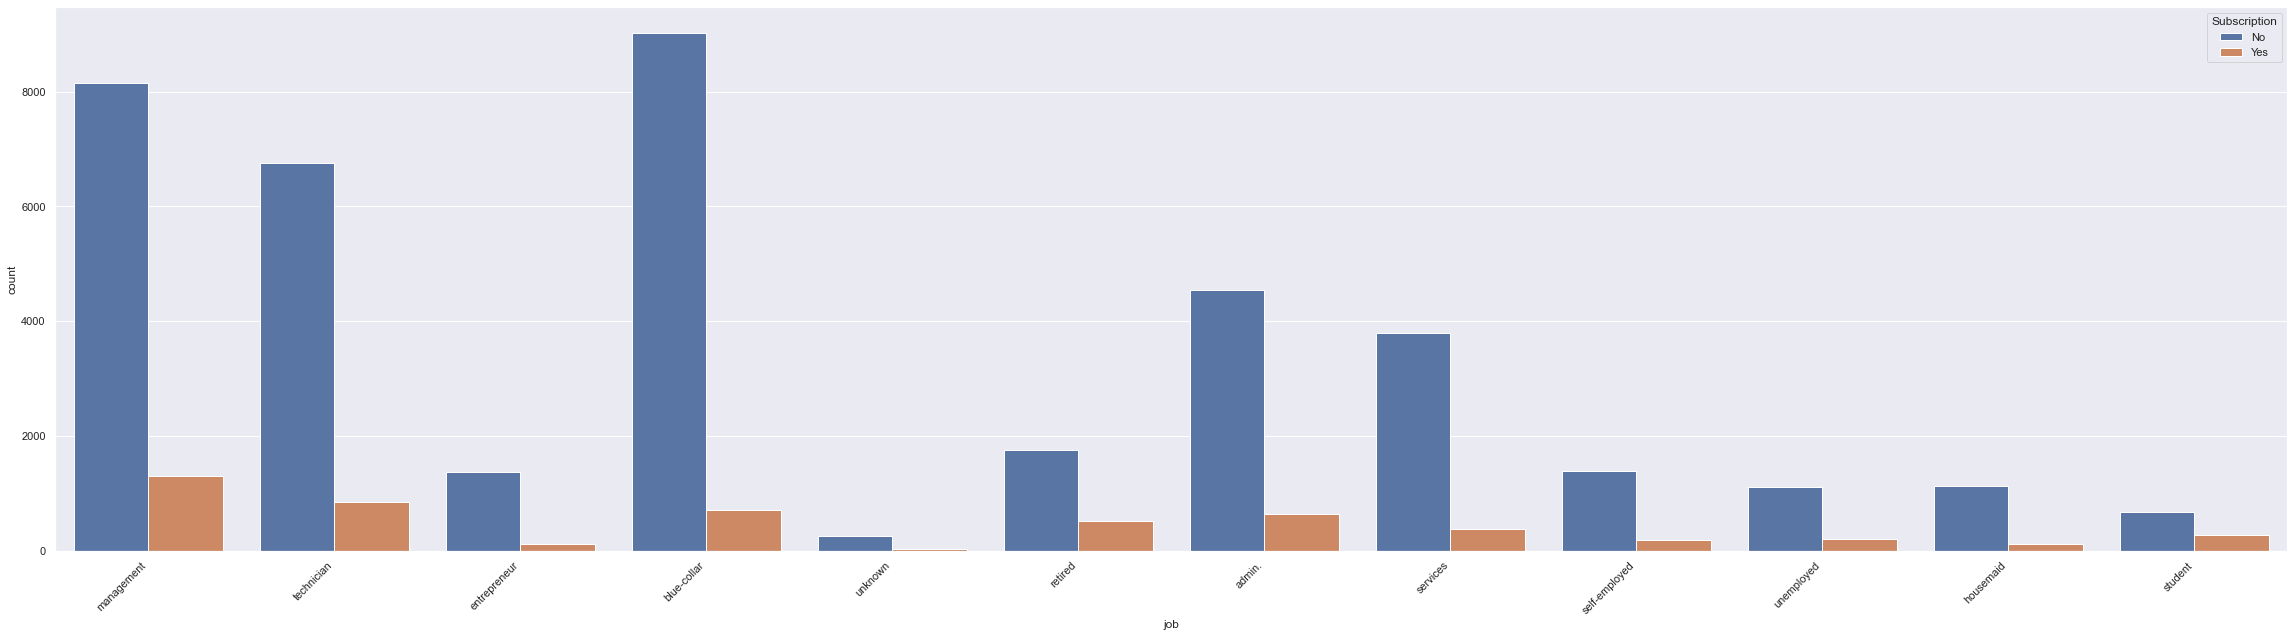

In [80]:
#graph of subscription withrespect to job  
plt.figure(figsize=(40,10))
chart=sns.countplot(data=data,x='job',hue='y')#ploting count plot by giving hue as suscribed or not
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()

The blue-collor, management and technician job people subscribe to the term deposits.

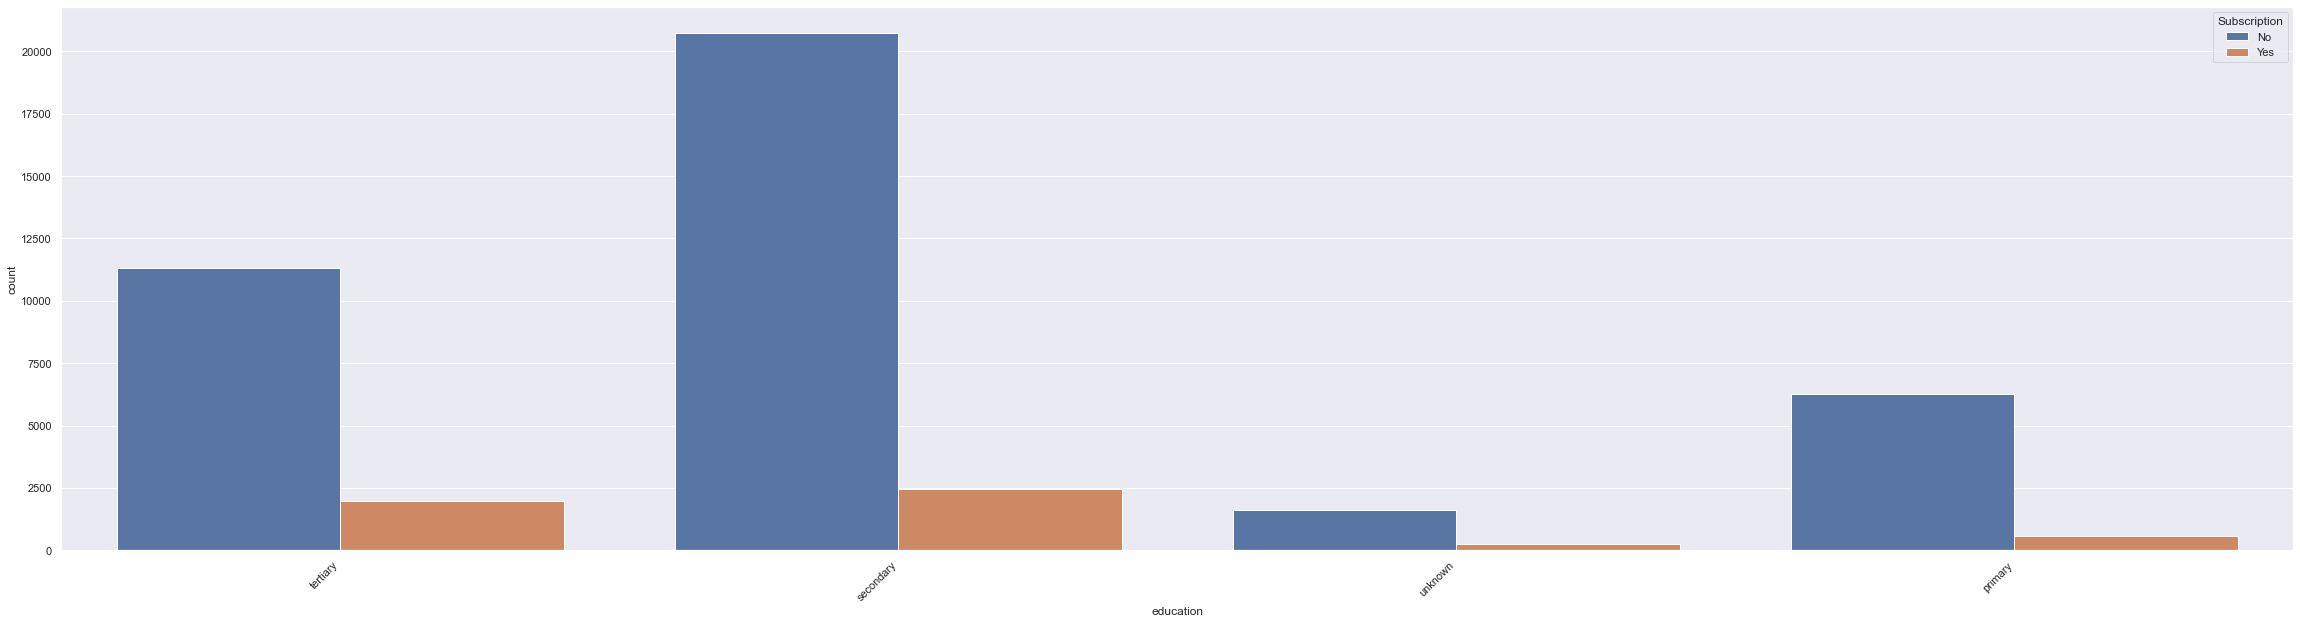

In [79]:
#graph of subscription withrespect to education  
plt.figure(figsize=(40,10))
chart=sns.countplot(data=data,x='education',hue='y')#ploting count plot by giving hue as suscribed or not
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()

Most of the customers who subscribe to term deposit are people who have secondary education.

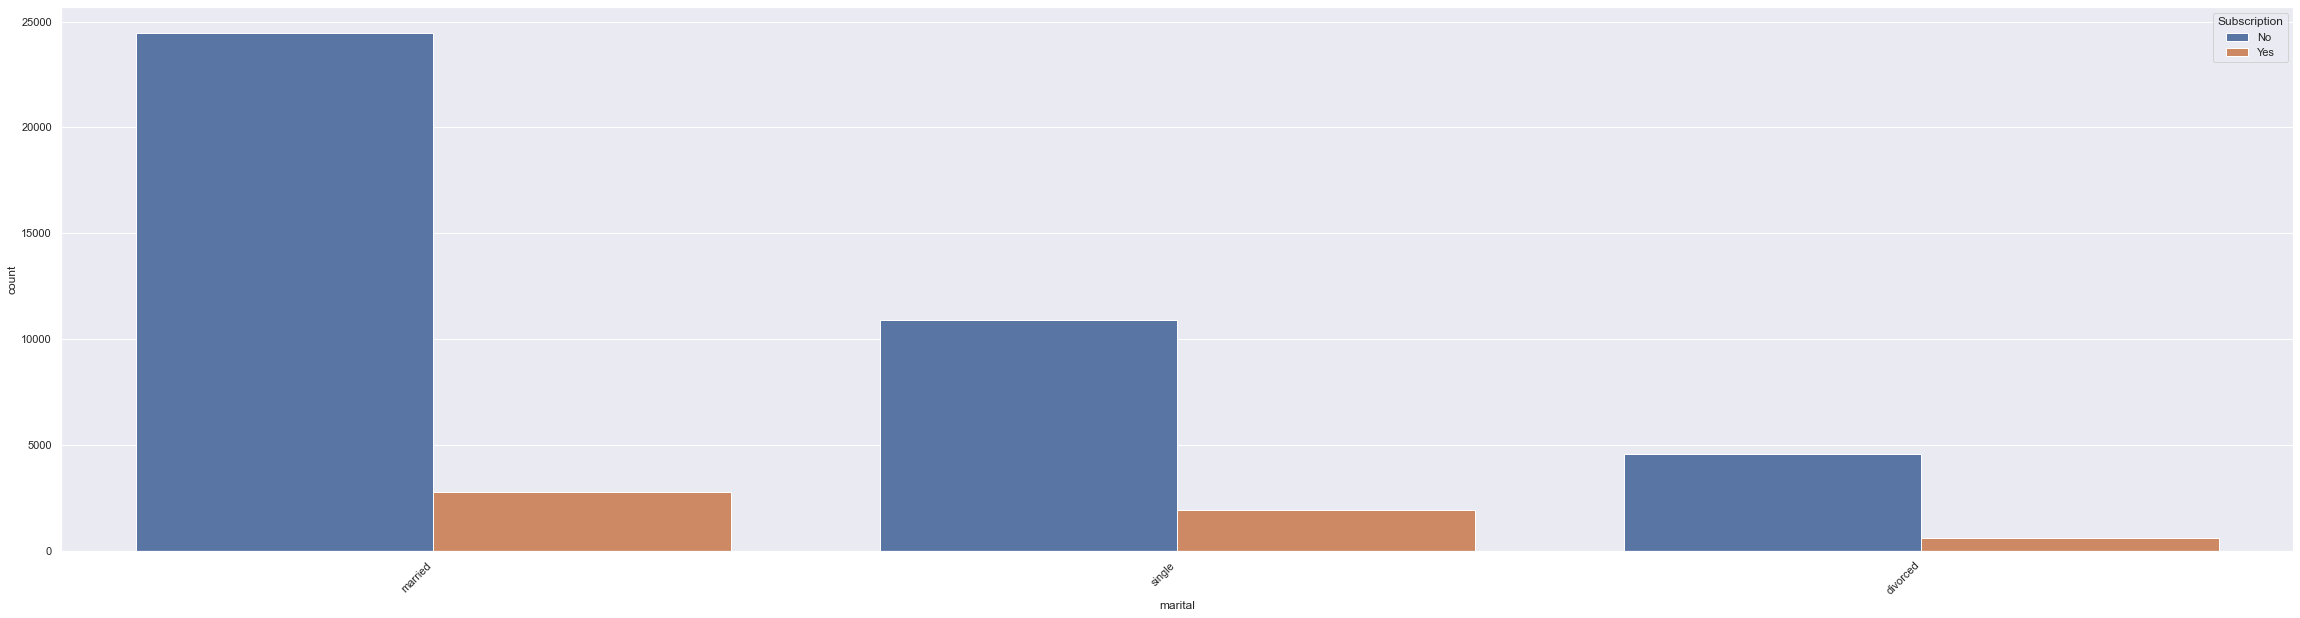

In [78]:
#graph of subscription withrespect to marital  
plt.figure(figsize=(40,10))
chart=sns.countplot(data=data,x='marital',hue='y')#ploting count plot by giving hue as suscribed or not
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()

Married people are the most dominant customers who have subscribed for term deposit

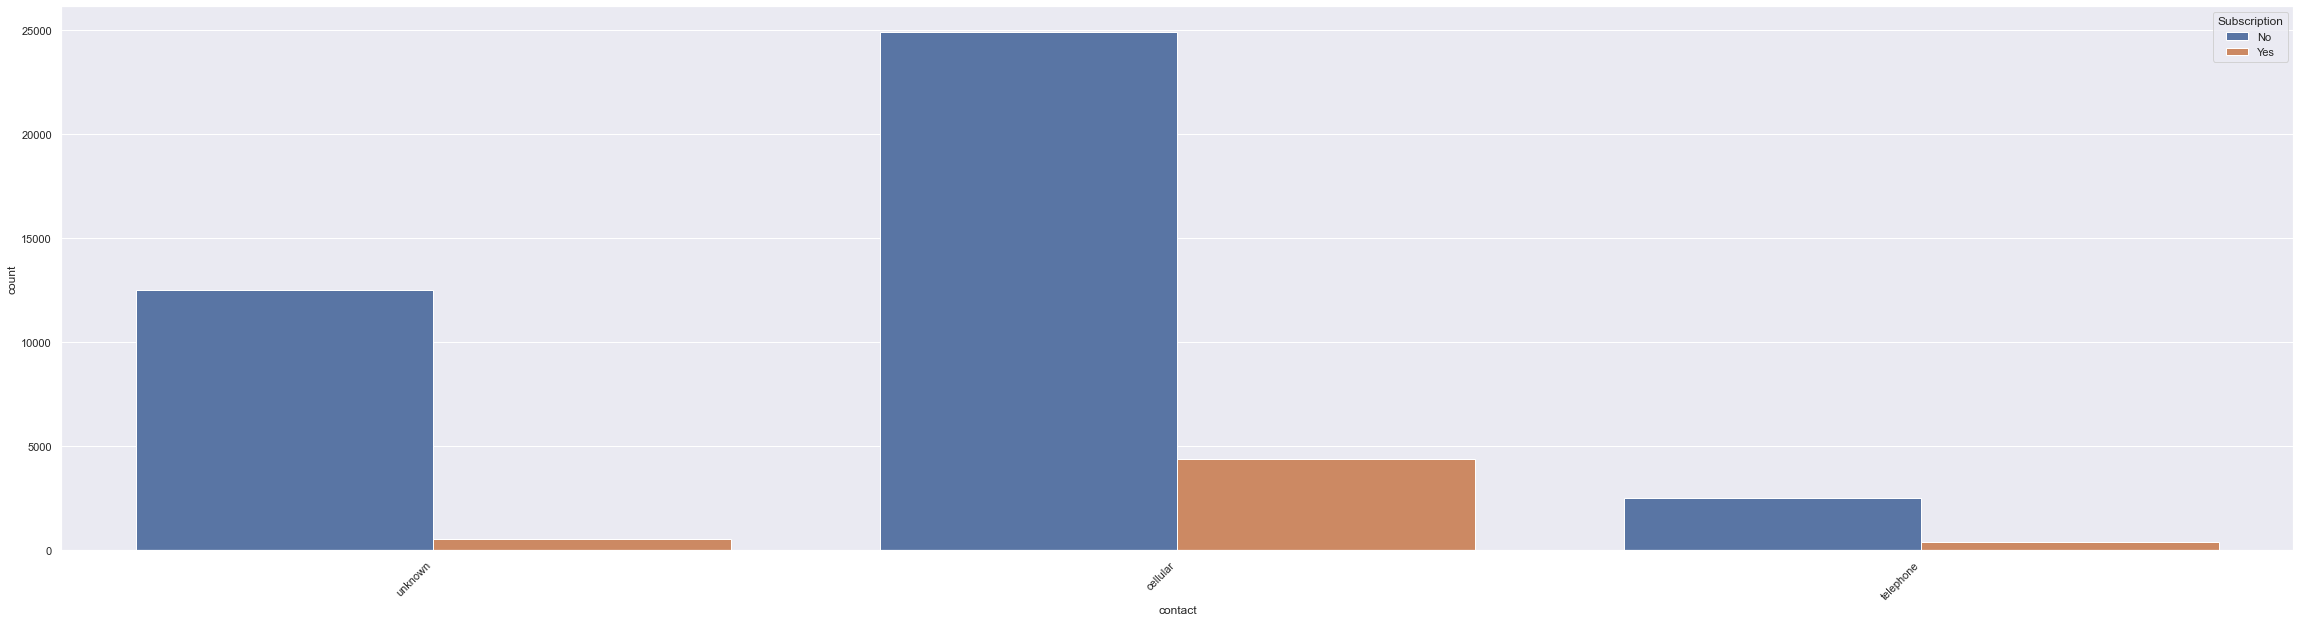

In [77]:
#graph of subscription withrespect to contact  
plt.figure(figsize=(40,10))
chart=sns.countplot(data=data,x='contact',hue='y')#ploting count plot by giving hue as suscribed or not
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()

Most of the customers where contacted through cellular who has done the subscription.

## 2. Feature engineering 

Tranform the categorical data into numerical,Since machine learning algorithms only take numerical values, all  categorical variables (job,marital, education, default, housing and loan,contact,month) are transformed into dummy variables.

In [10]:
category_col = category_col.to_list()#converting the category coloumns into a list
category_col.remove('y')#remove the coloumn 'y' from the category list
category_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [11]:
data['y'] = data['y'].replace({'no': 0, 'yes': 1})#replace the no with 0 and yes with 1 in coloumn 'y'
data['y'].value_counts()#check count of each unique values

0    39922
1     5289
Name: y, dtype: int64

there are 39922 customers who has not subscribed while only 5289 customers have suscribed to term deposit.

**OneHotEncoder**

OneHotEncoder is a technique used in machine learning and data preprocessing to transform categorical data into a numerical format. It works by representing each unique category as a binary vector where all values are zero except for one value which represents the category.

In [12]:
ce_OHE = ce.OneHotEncoder(cols=category_col)#apply onehotencoder to all the category coloumn list
data_encoded = ce_OHE.fit_transform(data)# fit the dataset to encodedd model
data_encoded.head()#displays the first 5 rows of encoded model

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,marital_1,marital_2,marital_3,education_1,education_2,education_3,education_4,default_1,default_2,balance,housing_1,housing_2,loan_1,loan_2,contact_1,contact_2,contact_3,day,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4,y
0,58,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2143,1,0,1,0,1,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,261,1,-1,0,1,0,0,0,0
1,44,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,29,1,0,1,0,1,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,151,1,-1,0,1,0,0,0,0
2,33,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,1,0,0,1,1,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,76,1,-1,0,1,0,0,0,0
3,47,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1506,1,0,1,0,1,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,92,1,-1,0,1,0,0,0,0
4,33,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,198,1,-1,0,1,0,0,0,0


we can see all the values are conversted into numerical 0's and 1's.

**3. Splitting the dataset**

In [13]:
X = data_encoded.drop(columns = ['y'])#drop the target variable
y = data_encoded['y']#selecting the target variable

print(X.shape, y.shape)

(45211, 51) (45211,)


In [14]:
#split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (33908, 51)
Number transactions y_train dataset:  (33908,)
Number transactions X_test dataset:  (11303, 51)
Number transactions y_test dataset:  (11303,)


**Data Normalization**

Data normalization is a data preprocessing technique used to transform the values of numerical variables in a dataset to a common scale. The main objective of normalization is to reduce the influence of variables with large value ranges that may dominate over other variables in the dataset during the analysis.
We use StandardScaler Standardize features by removing the mean and scaling to unit variance.

In [15]:
scaler = StandardScaler()# Create a StandardScaler object
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])# Fit and transform the training set
X_test[numeric_col] = scaler.fit_transform(X_test[numeric_col])# Fit and transform the testing set

X_train.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,marital_1,marital_2,marital_3,education_1,education_2,education_3,education_4,default_1,default_2,balance,housing_1,housing_2,loan_1,loan_2,contact_1,contact_2,contact_3,day,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
33362,-0.182764,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0.804030,1,0,1,0,0,1,0,0.504717,0,0,0,0,0,0,0,0,0,0,1,0,-0.718420,-0.568359,-0.411313,-0.239065,1,0,0,0
28229,-0.937547,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.097112,1,0,1,0,0,0,1,1.586706,0,0,0,0,0,0,0,1,0,0,0,0,-0.679683,-0.568359,-0.411313,-0.239065,1,0,0,0
37952,-0.465807,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,-0.157360,1,0,0,1,0,1,0,-0.216609,1,0,0,0,0,0,0,0,0,0,0,0,0.404962,1.050204,-0.411313,-0.239065,1,0,0,0
43408,-2.069721,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,-0.315873,0,1,1,0,0,1,0,-1.298599,0,0,0,0,0,0,0,0,0,0,1,0,0.269381,0.079067,-0.411313,-0.239065,1,0,0,0
9897,0.383324,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,-0.442812,0,1,1,0,1,0,0,-0.817714,0,1,0,0,0,0,0,0,0,0,0,0,-0.609956,-0.568359,-0.411313,-0.239065,1,0,0,0


The data set is imbalanced. Therefore, we should address this problem before using this data to build the model

# Handling imbalanced dataset

**Oversampling using SMOTE**

SMOTE stands for Synthetic Minority Oversampling Technique.
SMOTE selects the nearest examples in the feature space, then draws a line between them, and at a point along the line, it creates a new sample.

In [16]:

from imblearn.over_sampling import SMOTE #import SMOTE
from collections import Counter#import counter
# summarize class distribution
print(Counter(y_train))

# transform the dataset
oversample = SMOTE()#create an object for smote
X_train_smote, y_train = oversample.fit_resample(X_train, y_train)#fit the training set to smote object

# summarize the new class distribution
print(Counter(y_train))

Counter({0: 29944, 1: 3964})
Counter({0: 29944, 1: 29944})


#**Logistic regression**

In [17]:
# Logistic Regression
logr = LogisticRegression(random_state=0)
logr.fit(X_train_smote, y_train)#fit the logistic regression model to training data

LogisticRegression(random_state=0)

In [18]:
pred = logr.predict(X_train_smote)
acc = accuracy_score(y_train, pred)  # to calculate Accuracy
recall = recall_score(y_train, pred)  # to calculate Recall
precision = precision_score(y_train, pred)  # to calculate Precision
f1 = f1_score(y_train, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Training Data----------------------")
print(df_perf)



pred = logr.predict(X_test)
acc = accuracy_score(y_test, pred)  # to calculate Accuracy
recall = recall_score(y_test, pred)  # to calculate Recall
precision = precision_score(y_test, pred)  # to calculate Precision
f1 = f1_score(y_test, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Testing Data----------------------")
print(df_perf)


--------------Training Data----------------------
   Accuracy    Recall  Precision        F1
0  0.917212  0.887891   0.943203  0.914711
--------------Testing Data----------------------
   Accuracy    Recall  Precision        F1
0  0.893657  0.539623   0.547054  0.543313


---------------Training Data------------------
* The Accuracy of the training data is 0.917212.
* The Recall of the training data is 0.887891
* The Precision of the training data is 0.94320
* The F1 of the training data is 0.914711
----------------------Testing data--------------------
* The Accuracy of the testing data is 0.893657.
* The Recall of the testing data is 0.539623
* The Precision of the testing data is 0.547054
* The F1 of the testing data is 0.543313

# Hyper parameter tuning for logistic regression model

In [47]:
# Logistic Regression hyperparameter tuning

param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}#parameters for tuning
logr_cv = GridSearchCV(logr, param_grid_logreg)#apply the gridsearchcv

# training
logr_cv.fit(X_train_smote, y_train)#fit to new model
print("tuned hpyerparameters :", logr_cv.best_params_)
print("best score of training set :", round(logr_cv.best_score_, 3))

tuned hpyerparameters : {'C': 0.1}
best score of training set : 0.909


* The best hyperparameter which is tuned for C value is 0.1.

In [74]:
logr = LogisticRegression(C = 0.1, random_state=0)
logr.fit(X_train_smote, y_train)

print('---After adjusting parameters by GridSearch---')
pred = logr.predict(X_train_smote)
acc = accuracy_score(y_train, pred)  # to calculate Accuracy
recall = recall_score(y_train, pred)  # to calculate Recall
precision = precision_score(y_train, pred)  # to calculate Precision
f1 = f1_score(y_train, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf_train_lr = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Training Data----------------------")
print(df_perf_train_lr)



pred = logr.predict(X_test)
acc = accuracy_score(y_test, pred)  # to calculate Accuracy
recall = recall_score(y_test, pred)  # to calculate Recall
precision = precision_score(y_test, pred)  # to calculate Precision
f1 = f1_score(y_test, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf_test_lr = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=['LR'],
    )
print("--------------Testing Data----------------------")
print(df_perf_test_lr)


---After adjusting parameters by GridSearch---
--------------Training Data----------------------
   Accuracy    Recall  Precision        F1
0  0.916394  0.896173   0.933944  0.914668
--------------Testing Data----------------------
    Accuracy    Recall  Precision        F1
LR  0.887375  0.579623    0.51752  0.546814


----------------------Training Data LR------------------
* The Accuracy of the training data is 0.916394.
* The Recall of the training data is 0.896173.
* The Precision of the training data is 0.933944.
* The F1 of the training data is 0.914668.
----------------------Testing data LR--------------------
* The Accuracy of the testing data is 0.887375.
* The Recall of the testing data is 0.887375.
* The Precision of the testing data is 0.51752.
* The F1 of the testing data is 0.546814.

# SVM

In [40]:
# support vector machine classifier
clf = SVC(random_state=0)#creating an object for SVC
clf.fit(X_train_smote, y_train)#fitting the model to SVC


SVC(random_state=0)

In [41]:
#tracking the performance of model on training and testing dataset
pred = clf.predict(X_train_smote)#using the model created predict the values for raining data
acc = accuracy_score(y_train, pred)  # to calculate Accuracy
recall = recall_score(y_train, pred)  # to calculate Recall
precision = precision_score(y_train, pred)  # to calculate Precision
f1 = f1_score(y_train, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Training Data----------------------")
print(df_perf)



pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)  # to calculate Accuracy
recall = recall_score(y_test, pred)  # to calculate Recall
precision = precision_score(y_test, pred)  # to calculate Precision
f1 = f1_score(y_test, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Testing Data----------------------")
print(df_perf)


--------------Training Data----------------------
   Accuracy    Recall  Precision        F1
0  0.943127  0.945398   0.941124  0.943256
--------------Testing Data----------------------
   Accuracy    Recall  Precision        F1
0  0.893657  0.621887   0.540328  0.578246


----------------------Training Data SVM------------------
* The Accuracy of the training data is 0.943127.
* The Recall of the training data is 0.945398.
* The Precision of the training data is 0.941124.
* The F1 of the training data is 0.943256.
----------------------Testing  SVM--------------------
* The Accuracy of the testing data is 0.893657.
* The Recall of the testing data is 0.621887.
* The Precision of the testing data is 0.540328.
* The F1 of the testing data is 0.578246.

# hyper parameter tuning for SVM

In [43]:
# Linear Support Vector Machines

param_grid = {'C': [0.1, 1, 10, 100, 1000]} #setup the parameters for tuning
SVC_cv = GridSearchCV(clf, param_grid,refit = True, verbose = 3)#apply the gridsearch

# training 
SVC_cv.fit(X_train_smote, y_train)#fit the model
print("tuned hpyerparameters :(best parameters) ", SVC_cv.best_params_)
print("best score of training set :", round(SVC_cv.best_score_, 3))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.860 total time= 1.5min
[CV 2/5] END .............................C=0.1;, score=0.928 total time= 1.6min
[CV 3/5] END .............................C=0.1;, score=0.924 total time= 1.6min
[CV 4/5] END .............................C=0.1;, score=0.929 total time= 1.9min
[CV 5/5] END .............................C=0.1;, score=0.922 total time= 1.8min
[CV 1/5] END ...............................C=1;, score=0.805 total time= 1.3min
[CV 2/5] END ...............................C=1;, score=0.953 total time= 1.3min
[CV 3/5] END ...............................C=1;, score=0.948 total time= 1.2min
[CV 4/5] END ...............................C=1;, score=0.956 total time= 1.4min
[CV 5/5] END ...............................C=1;, score=0.949 total time=  55.2s
[CV 1/5] END ..............................C=10;, score=0.789 total time=  50.6s
[CV 2/5] END ..............................C=10;,

The best C value is 100 and we need to create new object for SVC with tuned parameters.

In [50]:
clf = SVC(C=100,random_state=0)#create a new object
clf.fit(X_train_smote, y_train)#fit the model

SVC(C=100, random_state=0)

In [73]:
#tracking the performance of model on training and testing dataset
pred = clf.predict(X_train_smote)
acc = accuracy_score(y_train, pred)  # to calculate Accuracy
recall = recall_score(y_train, pred)  # to calculate Recall
precision = precision_score(y_train, pred)  # to calculate Precision
f1 = f1_score(y_train, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf_train_svm = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Training Data----------------------")
print(df_perf_train_svm)



pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)  # to calculate Accuracy
recall = recall_score(y_test, pred)  # to calculate Recall
precision = precision_score(y_test, pred)  # to calculate Precision
f1 = f1_score(y_test, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf_test_svm = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=['svm'],
    )
print("--------------Testing Data----------------------")
print(df_perf_test_svm)


--------------Training Data----------------------
   Accuracy  Recall  Precision        F1
0  0.981766  0.9819   0.981637  0.981768
--------------Testing Data----------------------
     Accuracy    Recall  Precision       F1
svm  0.882686  0.516981   0.499635  0.50816


# Decision Tree classification

In [25]:
# building a decision tree model using the decisiontreeclassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_smote, y_train)#fitting the model

DecisionTreeClassifier(random_state=1)

In [26]:
pred = dTree.predict(X_train_smote)
acc = accuracy_score(y_train, pred)  # to calculate Accuracy
recall = recall_score(y_train, pred)  # to calculate Recall
precision = precision_score(y_train, pred)  # to calculate Precision
f1 = f1_score(y_train, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Training Data----------------------")
print(df_perf)



pred = dTree.predict(X_test)
acc = accuracy_score(y_test, pred)  # to calculate Accuracy
recall = recall_score(y_test, pred)  # to calculate Recall
precision = precision_score(y_test, pred)  # to calculate Precision
f1 = f1_score(y_test, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Testing Data----------------------")
print(df_perf)


--------------Training Data----------------------
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
--------------Testing Data----------------------
   Accuracy    Recall  Precision        F1
0  0.791117  0.650566   0.312319  0.422032


#Hyper parameter tuning

In [28]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth": [2,4,6,9,12,14,16],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
    "max_features" : ["auto", "sqrt", "log2"]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_smote, y_train)

# Set the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_smote, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='auto',
                       max_leaf_nodes=250, min_samples_split=70,
                       random_state=1)

In [29]:
pred = dTree.predict(X_train_smote)
acc = accuracy_score(y_train, pred)  # to calculate Accuracy
recall = recall_score(y_train, pred)  # to calculate Recall
precision = precision_score(y_train, pred)  # to calculate Precision
f1 = f1_score(y_train, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Training Data----------------------")
print(df_perf)



pred = dTree.predict(X_test)
acc = accuracy_score(y_test, pred)  # to calculate Accuracy
recall = recall_score(y_test, pred)  # to calculate Recall
precision = precision_score(y_test, pred)  # to calculate Precision
f1 = f1_score(y_test, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Testing Data----------------------")
print(df_perf)


--------------Training Data----------------------
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
--------------Testing Data----------------------
   Accuracy    Recall  Precision        F1
0  0.791117  0.650566   0.312319  0.422032


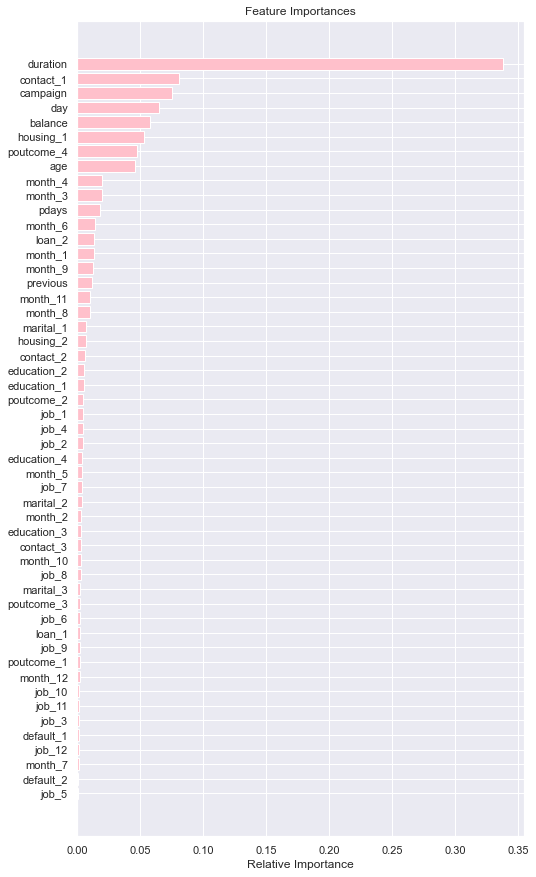

In [82]:
#checking for the features which are more important for building a decision 
feature_names = list(X_train_smote.columns)#fecting only coloumns
importances = dTree.feature_importances_# cheffcking for feature importance
indices = np.argsort(importances)#sort the features
#plot those features 
plt.figure(figsize=(8, 15))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

duration is the most important feature followed by campaign.
Now let's prune the tree to see if we can reduce the complexity.

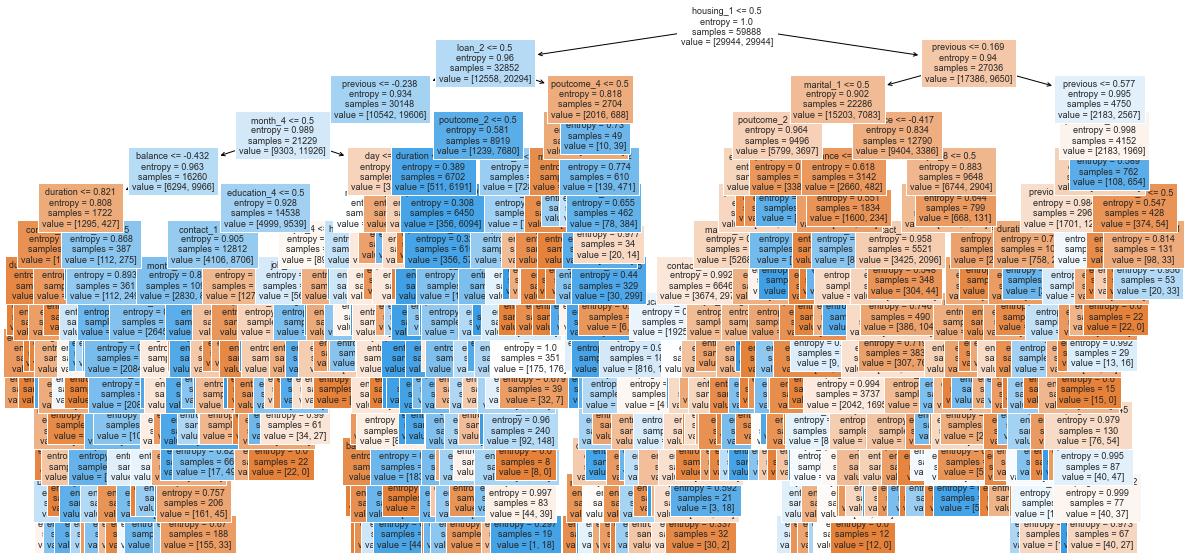

In [31]:
#plot the decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

by seeing the above tree we can easily make out the decision tree is overfitted

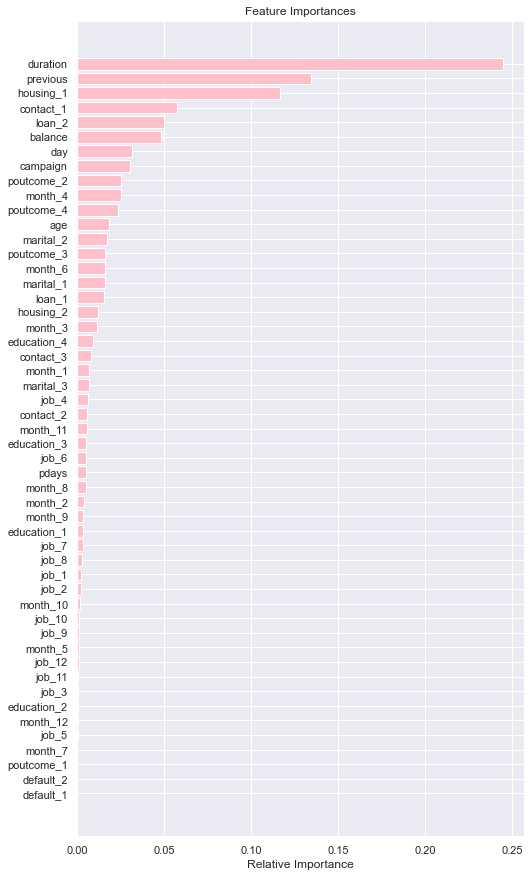

In [81]:
# importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 15))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations from decision tree**
We can see that the tree has become simpler and the rules of the trees are readable.
The model performance of the model has been generalized.
We observe that the most important features are:
1. duration
2. previous
3. housing_loan

In [33]:
# Calculate the complexity parameter alpha to prune the tree
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_smote, y_train)# o get the cost complexity pruning path
ccp_alphas = path.ccp_alphas[:-1]# to get the alpha values
ccp_trees = []
for ccp_alpha in ccp_alphas:
    tree_copy = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)#perform decisiontree classification for alpha values
    tree_copy.fit(X_train_smote, y_train)
    ccp_trees.append(tree_copy)
train_scores = [clf.score(X_train_smote, y_train) for clf in ccp_trees]
val_scores = [clf.score(X_test, y_test) for clf in ccp_trees]
best_alpha = ccp_alphas[val_scores.index(max(val_scores))]

# Prune the tree using the best alpha value
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train_smote, y_train)

DecisionTreeClassifier(ccp_alpha=0.005476004701279066, random_state=42)

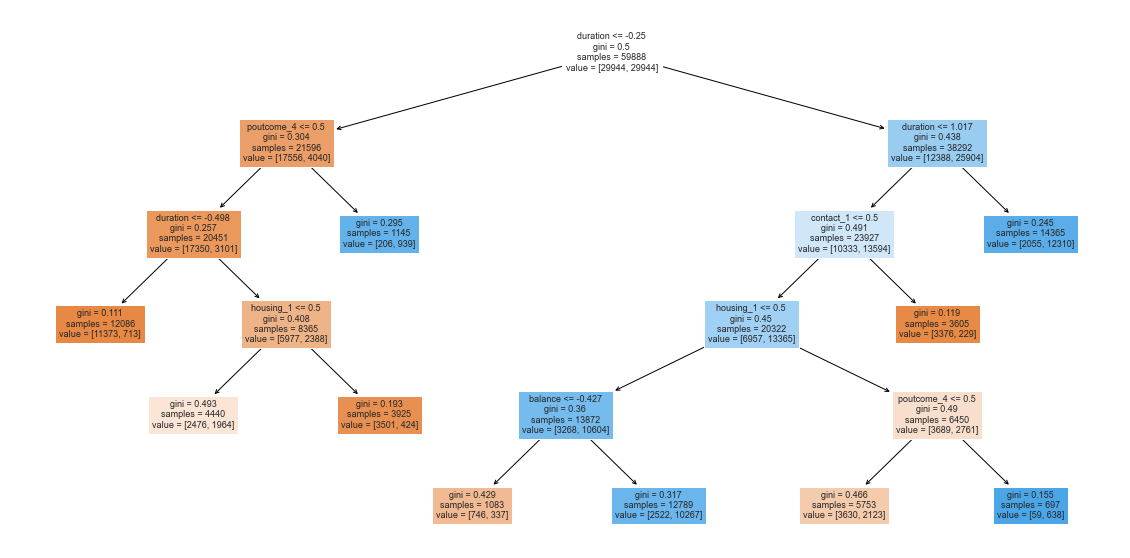

In [35]:

#plot the pruned decision tree 
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    pruned_tree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [72]:
pred = pruned_tree.predict(X_train_smote)
acc = accuracy_score(y_train, pred)  # to calculate Accuracy
recall = recall_score(y_train, pred)  # to calculate Recall
precision = precision_score(y_train, pred)  # to calculate Precision
f1 = f1_score(y_train, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf_train_dtree = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
print("--------------Training Data----------------------")
print(df_perf_train_dtree)



pred = pruned_tree.predict(X_test)
acc = accuracy_score(y_test, pred)  # to calculate Accuracy
recall = recall_score(y_test, pred)  # to calculate Recall
precision = precision_score(y_test, pred)  # to calculate Precision
f1 = f1_score(y_test, pred)  # to calculate F1-score

    # creating a dataframe of metrics
df_perf_test_dtree = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=['Tree'],
    )
print("--------------Testing Data----------------------")
print(df_perf_test_dtree)


--------------Training Data----------------------
   Accuracy    Recall  Precision        F1
0  0.822469  0.806639   0.833011  0.819613
--------------Testing Data----------------------
      Accuracy    Recall  Precision        F1
Tree  0.826241  0.742642   0.377445  0.500509


### Model performance comparision

In [75]:
df = pd.concat([df_perf_test_lr, df_perf_test_svm, df_perf_test_dtree])

In [76]:
df

,Accuracy,Recall,Precision,F1
LR,0.887375,0.579623,0.517520,0.546814
svm,0.882686,0.516981,0.499635,0.508160
Tree,0.826241,0.742642,0.377445,0.500509


1. According to the accuracy, f1 and precision metric the Logistic regression is the best model that is suitable for this dataset.
2. Recall is more for decision tree.
3. Overall the logistic regression will perform well on the data set to consider if the customers subscribe for the term deposit or not.
4. While the insight from the Decision Tree model is less deep and more generic, the insight from the Logistic Regression was able to provide us with a more in-depth study.
5. The Svm was better compared to that of the decision tree but LR performed better.
6. I firmly believe that the Logistic Regression Model was the most effective for analyzing this data set, gaining insights from each characteristic, and determining how each element influences a customer's likelihood of subscribing.

### Business insights/Recommendation

1. During the month of May,June,July,Aug most of the customers subscribed for term deposit hence the bank people have to contact the customers during this month.
2. The age of the customer who has suscribed for term deposit are between 24-60 but the maximum subscription starts from 30-60 years hence target on these age customers to increase the term deposits.
3. The blue-collor, management and technician job people subscribe to the term deposits, concentrate more on these customers to increase the count.
4. Most of the customers who subscribe to term deposit are people who have secondary education hence target more on customers who have done secondary education.
5. Married people are the most dominant customers who have subscribed for term deposit hence target more on married people.
6. Most of the customers where contacted through cellular who has done the subscription hence target more customers through cellular contact type.